# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp - 273.15,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | carrigaline
Processing Record 5 of Set 1 | ghadamis
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | ust-nera
Processing Record 8 of Set 1 | tura
Processing Record 9 of Set 1 | broken hill
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | hassi messaoud
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | vanimo
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | ha tinh
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | chudovo
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | inhambane
Processing Record 21 of Set 1 | midvagur
Processing Record 22 of Set 1 | shangri-la
City not found. Skipping...


Processing Record 34 of Set 4 | cable beach
City not found. Skipping...
Processing Record 35 of Set 4 | college
Processing Record 36 of Set 4 | santa ana
Processing Record 37 of Set 4 | alvaraes
Processing Record 38 of Set 4 | pont rouge
Processing Record 39 of Set 4 | whakatane
Processing Record 40 of Set 4 | arar
Processing Record 41 of Set 4 | glace bay
Processing Record 42 of Set 4 | revda
Processing Record 43 of Set 4 | dickinson
Processing Record 44 of Set 4 | tralee
Processing Record 45 of Set 4 | betio village
Processing Record 46 of Set 4 | pacific grove
Processing Record 47 of Set 4 | north ward
Processing Record 48 of Set 4 | mount darwin
Processing Record 49 of Set 4 | totness
Processing Record 0 of Set 5 | kavaratti
Processing Record 1 of Set 5 | hadibu
Processing Record 2 of Set 5 | puerto baquerizo moreno
Processing Record 3 of Set 5 | birni n konni
Processing Record 4 of Set 5 | puerto ayora
Processing Record 5 of Set 5 | vernon
Processing Record 6 of Set 5 | kunhegyes


Processing Record 25 of Set 8 | fale old settlement
Processing Record 26 of Set 8 | forster
Processing Record 27 of Set 8 | alofi
Processing Record 28 of Set 8 | beshkent
Processing Record 29 of Set 8 | mount isa
Processing Record 30 of Set 8 | mukalla
Processing Record 31 of Set 8 | sarkand
Processing Record 32 of Set 8 | masterton
Processing Record 33 of Set 8 | nar'yan-mar
Processing Record 34 of Set 8 | nantucket
Processing Record 35 of Set 8 | saipan
Processing Record 36 of Set 8 | celestun
Processing Record 37 of Set 8 | sisimiut
Processing Record 38 of Set 8 | nizhnesortymskiy
Processing Record 39 of Set 8 | campbell river
Processing Record 40 of Set 8 | prainha
Processing Record 41 of Set 8 | piti village
Processing Record 42 of Set 8 | wingham
Processing Record 43 of Set 8 | illizi
Processing Record 44 of Set 8 | kosh-agach
Processing Record 45 of Set 8 | hanzhong
Processing Record 46 of Set 8 | nadym
Processing Record 47 of Set 8 | al bawiti
Processing Record 48 of Set 8 | bu

Processing Record 15 of Set 12 | sarkikaraagac
Processing Record 16 of Set 12 | jijel
Processing Record 17 of Set 12 | tapes
Processing Record 18 of Set 12 | ust'-ilimsk
Processing Record 19 of Set 12 | bardai
Processing Record 20 of Set 12 | maua
Processing Record 21 of Set 12 | zarah sharan
Processing Record 22 of Set 12 | arkalyk
Processing Record 23 of Set 12 | jacobabad
Processing Record 24 of Set 12 | haiku-pauwela
Processing Record 25 of Set 12 | laojunmiao
Processing Record 26 of Set 12 | yulinshi
Processing Record 27 of Set 12 | fangshan
Processing Record 28 of Set 12 | usogorsk
Processing Record 29 of Set 12 | smara
Processing Record 30 of Set 12 | gisborne
Processing Record 31 of Set 12 | kedrovyy
Processing Record 32 of Set 12 | azna
Processing Record 33 of Set 12 | triyuga
City not found. Skipping...
Processing Record 34 of Set 12 | la sierpe
Processing Record 35 of Set 12 | fairview
Processing Record 36 of Set 12 | bich'vinta
Processing Record 37 of Set 12 | landeck
Proce

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.73,70,5,4.38,PN,1697070799
1,hermanus,-34.4187,19.2345,15.63,84,98,3.11,ZA,1697070800
2,bethel,41.3712,-73.4140,15.17,79,0,2.06,US,1697070801
3,carrigaline,51.8117,-8.3986,9.86,93,75,3.09,IE,1697070802
4,ghadamis,30.1337,9.5007,21.66,40,0,4.14,LY,1697070802


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.73,70,5,4.38,PN,1697070799
1,hermanus,-34.4187,19.2345,15.63,84,98,3.11,ZA,1697070800
2,bethel,41.3712,-73.4140,15.17,79,0,2.06,US,1697070801
3,carrigaline,51.8117,-8.3986,9.86,93,75,3.09,IE,1697070802
4,ghadamis,30.1337,9.5007,21.66,40,0,4.14,LY,1697070802


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

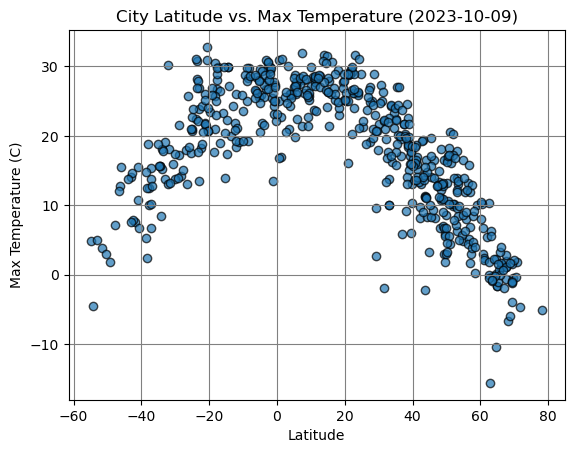

In [47]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

plt.scatter(latitude, temperature, edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-10-09)")
plt.rc("grid", linestyle="-", color='grey')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

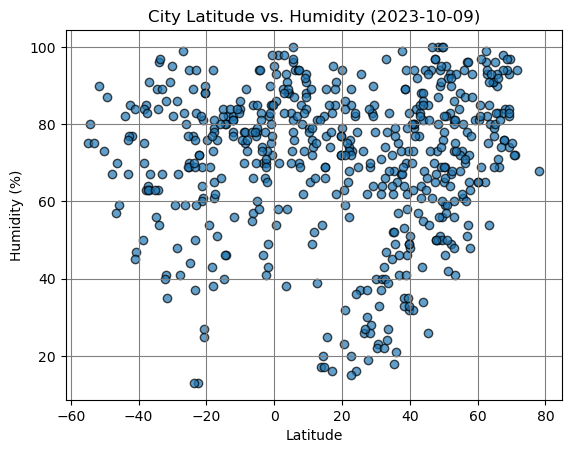

In [48]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

plt.scatter(latitude, humidity, edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-10-09)")
plt.rc("grid", linestyle="-", color='grey')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

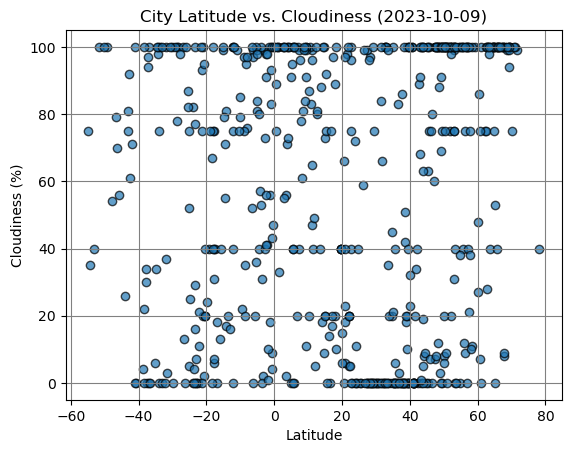

In [49]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

plt.scatter(latitude, cloudiness, edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-10-09)")
plt.rc("grid", linestyle="-", color='grey')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

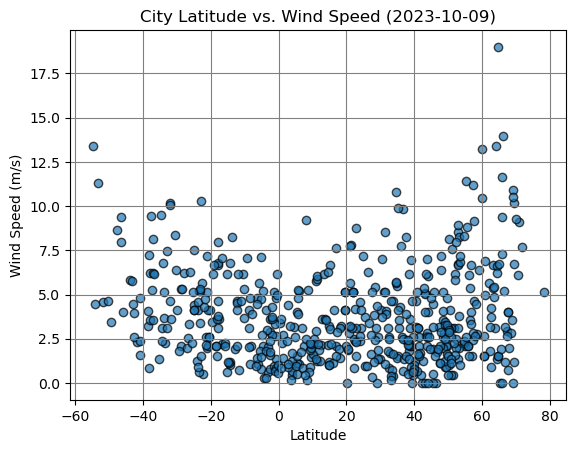

In [50]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]

plt.scatter(latitude, wind_speed, edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-10-09)")
plt.rc("grid", linestyle="-", color='grey')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def r_plotter(y_label, n_or_s, line_loc):
    
    if n_or_s == "North":
        x = northern_hemi_df["Lat"]
        y = northern_hemi_df[f"{y_label}"]
    else:
        x = southern_hemi_df["Lat"]
        y = southern_hemi_df[f"{y_label}"]
    
    plt.scatter(x, y)
    
    (m, b, r, p, se) = linregress(x, y)
    r_values = m * x + b
    
    plt.plot(x, r_values, "red")
    
    if line_loc == "bl":
        where = (min(x), min(y))
    elif line_loc == "tl":
        where = (min(x), max(y)*0.8)
    elif line_loc == "br":
        where = (max(x)-30, min(y))
    else:
        where = (max(x)-30, max(y)*0.8)
        
    plt.annotate(f"y = {round(m, 2)}x + {round(b,2)}", where, fontsize=15,color="red")
    
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(f"{n_or_s}ern Hemisphere: {y_label} vs Latitude")
    print(f"The r-value is: {r}")
    print(f"R²: {r**2}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bethel,41.3712,-73.4140,15.17,79,0,2.06,US,1697070801
3,carrigaline,51.8117,-8.3986,9.86,93,75,3.09,IE,1697070802
4,ghadamis,30.1337,9.5007,21.66,40,0,4.14,LY,1697070802
5,stanley,54.8680,-1.6985,4.87,88,0,2.06,GB,1697069984
6,ust-nera,64.5667,143.2000,-10.44,91,100,1.34,RU,1697070803


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.73,70,5,4.38,PN,1697070799
1,hermanus,-34.4187,19.2345,15.63,84,98,3.11,ZA,1697070800
8,broken hill,-31.9500,141.4333,18.16,41,37,10.19,AU,1697070391
12,vanimo,-2.6741,141.3028,28.06,78,73,2.87,PG,1697070807
13,geraldton,-28.7667,114.6000,17.23,48,78,2.06,AU,1697070808


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8647466908102566
R²: 0.7477868392672895


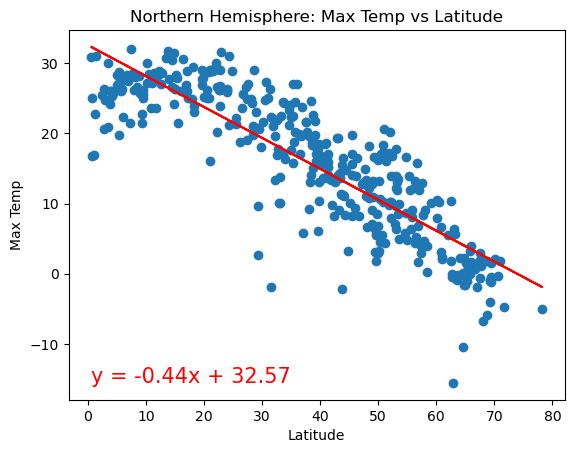

In [54]:
# Linear regression on Northern Hemisphere

r_plotter("Max Temp", "North", "bl")

The r-value is: 0.7847938605041416
R²: 0.615901403484994


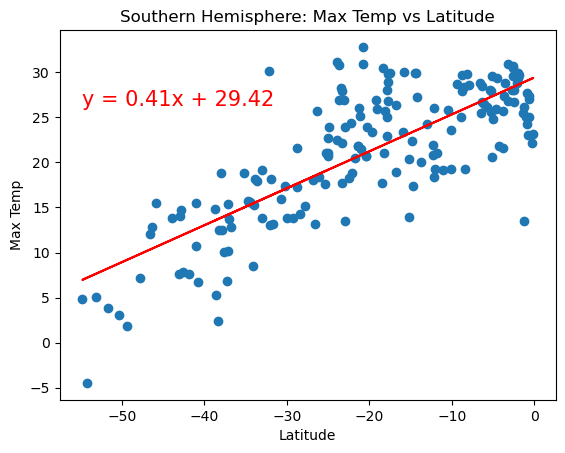

In [55]:
# Linear regression on Southern Hemisphere

r_plotter("Max Temp", "South", "tl")

**Discussion about the linear relationship:** The r-values for both northern and southern hemispheres show strong correlation between latitude and max temperature. The R² values show that about 75% of the variation in northern hemisphere max temperatures and about 62% of the variation in southern hemisphere max temperatures can be explained by latitude. As latitude gets closer to the equator (0), the max temperature tends to be higher.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1161923978184187
R²: 0.01350067331079367


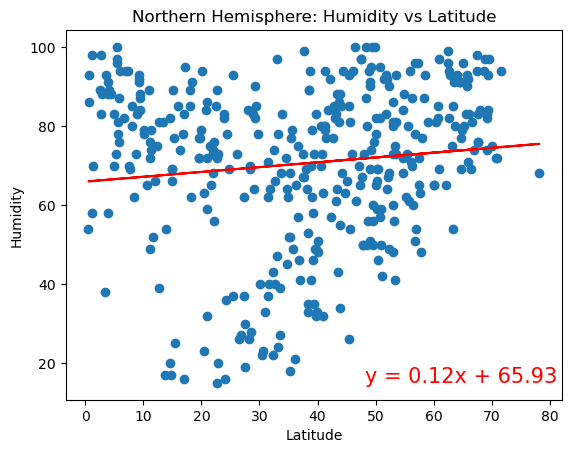

In [56]:
# Northern Hemisphere

r_plotter("Humidity", "North", "br")

The r-value is: 0.06436421852150875
R²: 0.00414275262588453


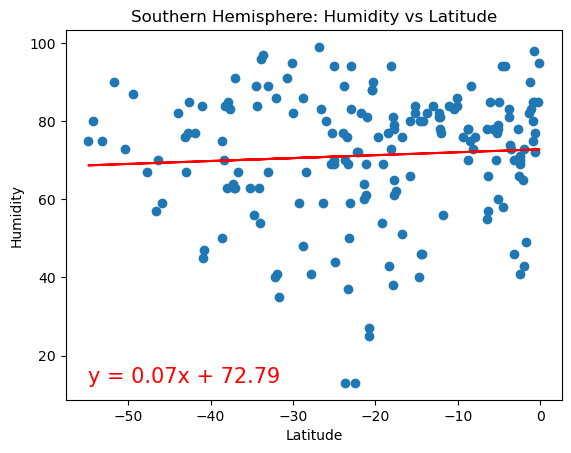

In [57]:
# Southern Hemisphere

r_plotter("Humidity", "South", "bl")

**Discussion about the linear relationship:** The r-values for both northern and southern hemispheres show very weak to no correlation between latitude and humidity. The R² values show that about 1% of the variation in northern hemisphere humidity and about 0% of the variation in southern hemisphere humidity can be explained by latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14679469443392748
R²: 0.02154868231395014


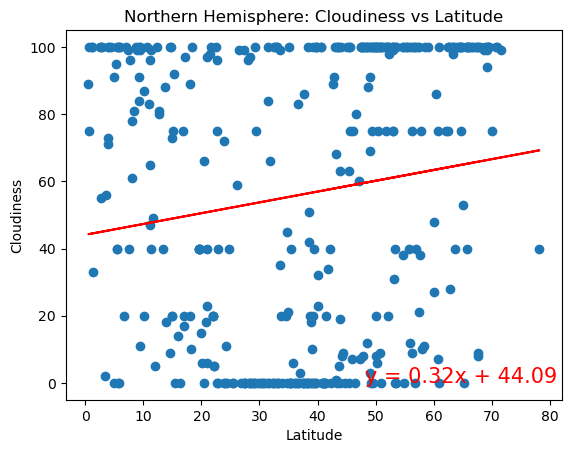

In [58]:
# Northern Hemisphere

r_plotter("Cloudiness", "North", "br")

The r-value is: 0.03879196422386957
R²: 0.0015048164883459765


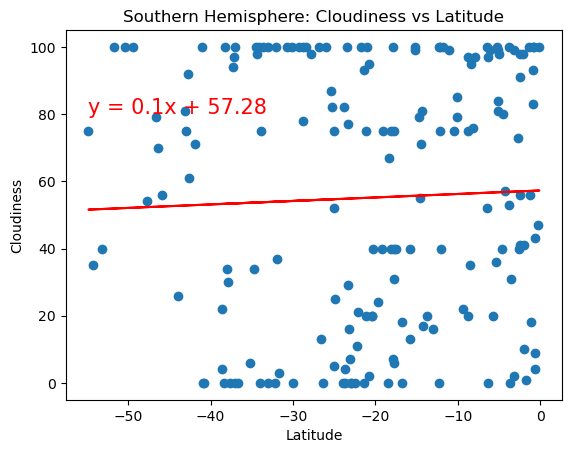

In [59]:
# Southern Hemisphere

r_plotter("Cloudiness", "South", "tl")

**Discussion about the linear relationship:** The r-values for both northern and southern hemispheres show very weak to no correlation between latitude and cloudiness. The R² values show that about 2% of the variation in northern hemisphere cloudiness and about 0% of the variation in southern hemisphere cloudiness can be explained by latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2673439092006722
R²: 0.07147276578669726


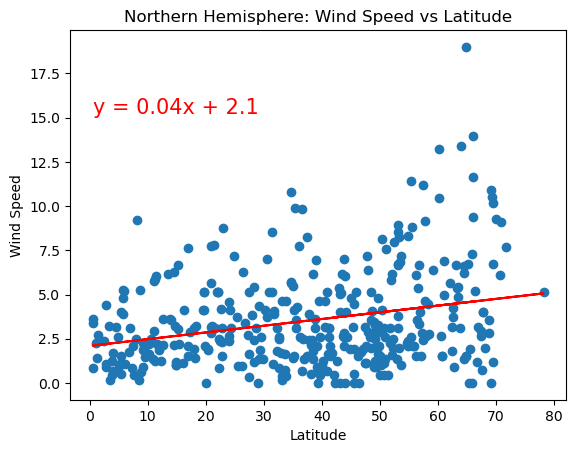

In [60]:
# Northern Hemisphere

r_plotter("Wind Speed", "North", "tl")

The r-value is: -0.405668850908033
R²: 0.1645672165970439


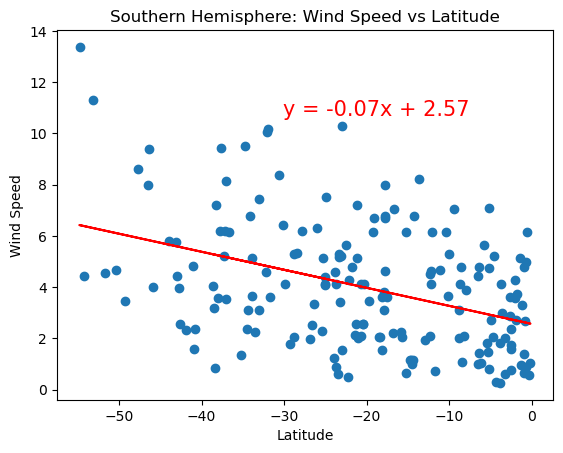

In [61]:
# Southern Hemisphere

r_plotter("Wind Speed", "South", "tr")

**Discussion about the linear relationship:** The r-values for both northern and southern hemispheres show very weak to weak correlation between latitude and wind speed. The R² values show that about 7% of the variation in northern hemisphere cloudiness and about 16% of the variation in southern hemisphere cloudiness can be explained by latitude. 